# Introduction

This project focuses on predicting the future bike rental count (cnt) for the Capital Bikeshare system in Washington, D.C., using historical data. The dataset includes hourly rental counts from January 1, 2011, to December 31, 2012, along with weather and seasonal information. The goal is to predict rental demand for the next O=240 hours (long-term prediction) based on the past I=96 hours of data.

The task involves preprocessing the data, extracting relevant features (e.g., weather, time of day, season), and training a predictive model to forecast bike rental counts. Emphasis will be placed on evaluating the model's performance and ensuring accurate predictions for the 240-hour horizon. This analysis aims to assist bike-sharing operators in optimizing resource allocation and improving service efficiency.

本代码属于苏州大学2024年研究生机器学习课程项目的代码部分，编者：20244227023.b

# Analysis


Simple feature engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/kaggle/input/capitalbikeshare/train_data.csv')

# Display first few rows
print("First few rows of the dataset:")
print(df.head())
print("\n" + "="*80 + "\n")

# Analyze each column
# Create separate DataFrames for different types of columns
categorical_cols = []
int_cols = []
float_cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)
    elif df[col].dtype == 'int64':
        int_cols.append(col)
    else:
        float_cols.append(col)

# Analyze categorical columns
if categorical_cols:
    cat_analysis = pd.DataFrame({
        'Column': categorical_cols,
        'Unique Values': [df[col].nunique() for col in categorical_cols],
        'Missing Rate (%)': [(df[col].isnull().sum() / len(df)) * 100 for col in categorical_cols],
        'Most Common Value': [df[col].mode()[0] for col in categorical_cols]
    })
    print("Categorical Columns Analysis:")
    print(cat_analysis)
    print("\n" + "="*80 + "\n")

# Analyze integer columns
if int_cols:
    int_analysis = pd.DataFrame({
        'Column': int_cols,
        'Min': [df[col].min() for col in int_cols],
        'Max': [df[col].max() for col in int_cols],
        'Mean': [df[col].mean() for col in int_cols],
        'Median': [df[col].median() for col in int_cols],
        'Missing Rate (%)': [(df[col].isnull().sum() / len(df)) * 100 for col in int_cols]
    })
    print("Integer Columns Analysis:")
    print(int_analysis)
    print("\n" + "="*80 + "\n")

# Analyze float columns
if float_cols:
    float_analysis = pd.DataFrame({
        'Column': float_cols,
        'Min': [df[col].min() for col in float_cols],
        'Max': [df[col].max() for col in float_cols],
        'Mean': [df[col].mean() for col in float_cols],
        'Median': [df[col].median() for col in float_cols],
        'Missing Rate (%)': [(df[col].isnull().sum() / len(df)) * 100 for col in float_cols]
    })
    print("Float Columns Analysis:")
    print(float_analysis)

First few rows of the dataset:
   instant    dteday  season   yr  mnth   hr  holiday  weekday  workingday  \
0      1.0  2011/1/1     1.0  0.0   1.0  0.0      0.0      6.0         0.0   
1      2.0  2011/1/1     1.0  0.0   1.0  1.0      0.0      6.0         0.0   
2      3.0  2011/1/1     1.0  0.0   1.0  2.0      0.0      6.0         0.0   
3      4.0  2011/1/1     1.0  0.0   1.0  3.0      0.0      6.0         0.0   
4      5.0  2011/1/1     1.0  0.0   1.0  4.0      0.0      6.0         0.0   

   weathersit  temp   atemp   hum  windspeed  casual  registered   cnt  
0         1.0  0.24  0.2879  0.81        0.0     3.0        13.0  16.0  
1         1.0  0.22  0.2727  0.80        0.0     8.0        32.0  40.0  
2         1.0  0.22  0.2727  0.80        0.0     5.0        27.0  32.0  
3         1.0  0.24  0.2879  0.75        0.0     3.0        10.0  13.0  
4         1.0  0.24  0.2879  0.75        0.0     0.0         1.0   1.0  


Categorical Columns Analysis:
   Column  Unique Values  Miss

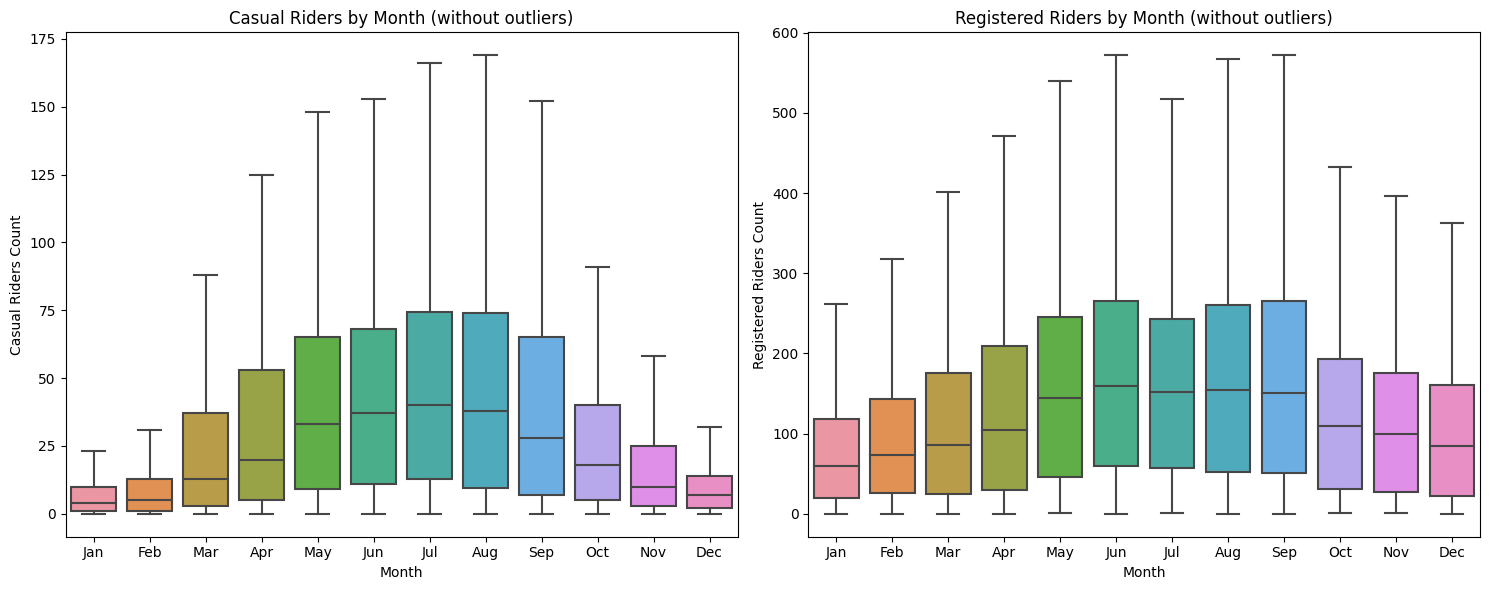

In [2]:
plt.figure(figsize=(15, 6))

# Create two subplots side by side
plt.subplot(1, 2, 1)
sns.boxplot(x='mnth', y='casual', data=df, showfliers=False)  # showfliers=False removes outliers
plt.title('Casual Riders by Month (without outliers)')
plt.xlabel('Month')
plt.ylabel('Casual Riders Count')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.subplot(1, 2, 2)
sns.boxplot(x='mnth', y='registered', data=df, showfliers=False)  # showfliers=False removes outliers
plt.title('Registered Riders by Month (without outliers)')
plt.xlabel('Month')
plt.ylabel('Registered Riders Count')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

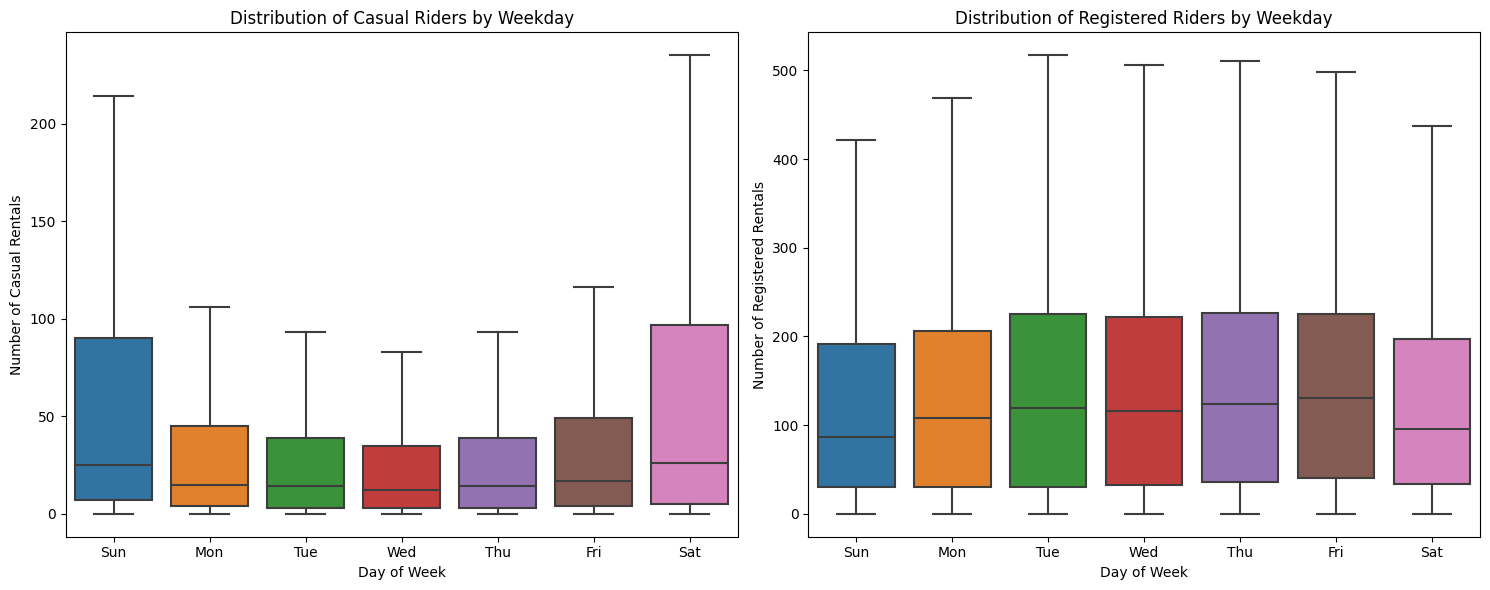

In [3]:
plt.figure(figsize=(15, 6))

# Create two subplots side by side
plt.subplot(1, 2, 1)
sns.boxplot(x='weekday', y='casual', data=df, showfliers=False)
plt.title('Distribution of Casual Riders by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Number of Casual Rentals')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

plt.subplot(1, 2, 2)
sns.boxplot(x='weekday', y='registered', data=df, showfliers=False)
plt.title('Distribution of Registered Riders by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Number of Registered Rentals')
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

plt.tight_layout()
plt.show()

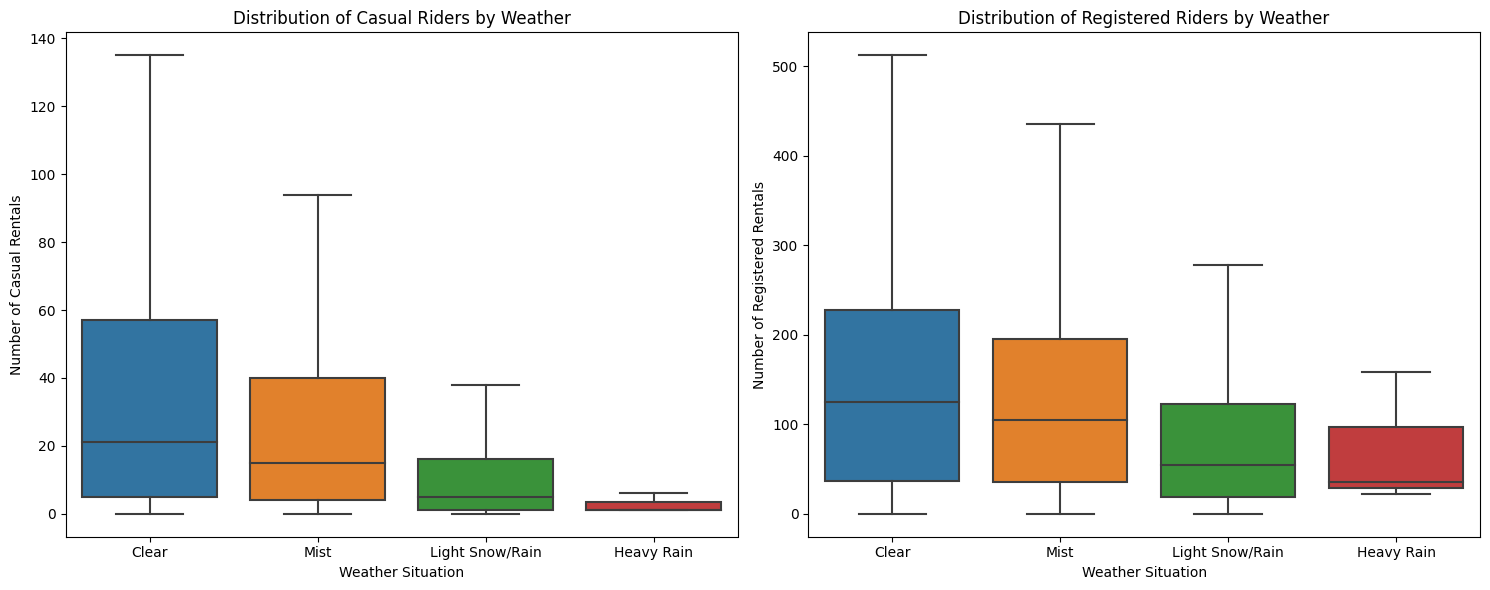

In [4]:
plt.figure(figsize=(15, 6))

# Create two subplots side by side
plt.subplot(1, 2, 1)
sns.boxplot(x='weathersit', y='casual', data=df, showfliers=False)
plt.title('Distribution of Casual Riders by Weather')
plt.xlabel('Weather Situation')
plt.ylabel('Number of Casual Rentals')
plt.xticks(range(4), ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain'])

plt.subplot(1, 2, 2)
sns.boxplot(x='weathersit', y='registered', data=df, showfliers=False)
plt.title('Distribution of Registered Riders by Weather')
plt.xlabel('Weather Situation')
plt.ylabel('Number of Registered Rentals')
plt.xticks(range(4), ['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain'])

plt.tight_layout()
plt.show()

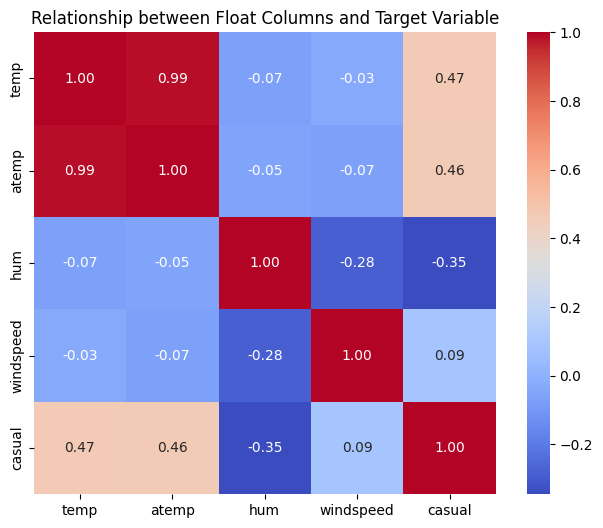

In [5]:
float_columns = ['temp', 'atemp', 'hum', 'windspeed']
target = 'casual'

correlations = df[float_columns + [target]].corr()

target_correlations = correlations[target][float_columns]


plt.figure(figsize=(8, 6))
sns.heatmap(
    correlations,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True,
    square=True
)
plt.title("Relationship between Float Columns and Target Variable")
plt.show()

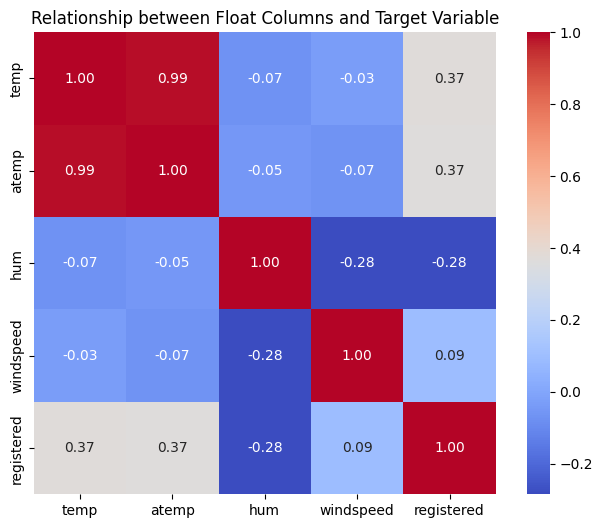

In [6]:
float_columns = ['temp', 'atemp', 'hum', 'windspeed']
target = 'registered'

correlations = df[float_columns + [target]].corr()

target_correlations = correlations[target][float_columns]


plt.figure(figsize=(8, 6))
sns.heatmap(
    correlations,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar=True,
    square=True
)
plt.title("Relationship between Float Columns and Target Variable")
plt.show()

# Preprocessing

Let’s break down the core components of this code for predicting bike rental demand:

1. **Data Preparation**:  
   The `BikeDataProcessor` class handles preprocessing. It cleans the dataset by dropping irrelevant columns, normalizes continuous features (like temperature and humidity), and encodes categorical features (like season and hour). It then creates sequences of 96 hours of input data to predict the next 240 hours of bike rentals.

2. **Dataset Creation**:  
   The `BikeDataset` class converts the processed data into PyTorch-compatible tensors. It organizes categorical and continuous features into a format suitable for training, making it easy to load batches of data using PyTorch’s `DataLoader`.

3. **Device Setup**:  
   The code automatically detects if a GPU is available (`cuda`) and uses it for faster computation; otherwise, it defaults to the CPU.

In summary, this pipeline prepares time-series data for training a model to predict bike rentals over a 240-hour window, ensuring the data is clean, normalized, and ready for machine learning.

In [7]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import math

DEVICES = 'cuda' if torch.cuda.is_available() else 'cpu'
OUTPUT_WINDOW_SIZE = 240


class BikeDataProcessor:
    def __init__(self, input_window=96, output_window=240):
        self.input_window = input_window
        self.output_window = output_window
        self.categorical_features = ['season', 'mnth', 'hr', 'holiday',
                                     'weekday', 'workingday', 'weathersit']
        self.continuous_features = ['temp', 'atemp', 'hum', 'windspeed']
        self.target_features = ['casual', 'registered']
        self.drop_features = ['instant', 'dteday', 'cnt', 'yr']
        self.scaler = StandardScaler()

    def process_data(self, filepath):
        # Preprocess Datas
        df = pd.read_csv(filepath)
        df = df.drop(self.drop_features, axis=1)
        df = df.ffill()
        df['season'] = df['season'] - 1
        df['mnth'] = df['mnth'] - 1
        df['weathersit'] = df['weathersit'] - 1

        # Normalization and classification
        cont_data = df[self.continuous_features].values
        scaled_cont = self.scaler.fit_transform(cont_data)
        cat_data = df[self.categorical_features].values.astype(int)
        target_data = df[self.target_features].values

        return self.create_sequences(cat_data, scaled_cont, target_data)

    def create_sequences(self, cat_data, cont_data, target_data):
        X_cat, X_cont, y = [], [], []

        for i in range(len(target_data) - self.input_window - self.output_window + 1):
            X_cat.append(cat_data[i:i+self.input_window])
            X_cont.append(cont_data[i:i+self.input_window])
            y.append(target_data[i+self.input_window:i +
                     self.input_window+self.output_window])

        return (np.array(X_cat), np.array(X_cont), np.array(y))


class BikeDataset(Dataset):
    def __init__(self, X_cat, X_cont, y):
        self.X_cat = torch.tensor(X_cat, dtype=torch.long)
        self.X_cont = torch.tensor(X_cont, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return {
            'cat_features': self.X_cat[idx],
            'cont_features': self.X_cont[idx],
            'target': self.y[idx]
        }

# Models

This code defines a **Sequence Variational Autoencoder (VAE)** using PyTorch, designed for sequence prediction tasks like forecasting bike rentals. Here's a breakdown of its core components:

### **1. Variational Dropout**  
- **Purpose**: Applies dropout during training to prevent overfitting.  
- **Key Feature**: It uses a **variational** approach, meaning the dropout mask is consistent across a sequence for stability.  


### **2. Positional Encoding**  
- **Purpose**: Adds positional information to the input sequences, crucial for models like Transformers that lack inherent sequence awareness.  
- **Key Feature**: Uses sine and cosine functions to encode positions, allowing the model to understand the order of elements in the sequence.  

### **3. Sequence VAE**  
The main model combines **categorical embeddings**, **Transformer encoders/decoders**, and a **latent space** for sequence prediction.  

#### **Key Components**:  
- **Embeddings**: Converts categorical features (e.g., season, hour) into dense vectors.  
- **Transformer Encoder**: Processes input sequences with self-attention, capturing temporal dependencies.  
- **Latent Space**: Encodes the sequence into a probabilistic latent representation (`mu` and `logvar`), enabling variational inference.  
- **Transformer Decoder**: Reconstructs the sequence from the latent space, using a causal mask to prevent future information leakage.  
- **Output Layer**: Predicts the final output (e.g., bike rental counts).  

#### **Workflow**:  
1. **Encode**: Input sequences (categorical + continuous features) are embedded, normalized, and passed through the Transformer encoder to produce latent variables (`mu` and `logvar`).  
2. **Reparameterize**: Samples from the latent space using the reparameterization trick for training stability.  
3. **Decode**: Reconstructs the sequence from the latent space using the Transformer decoder and predicts the output.  

---

### **Why It’s Useful**:  
This model is ideal for **time-series forecasting** tasks, such as predicting bike rentals, where capturing temporal patterns and uncertainty is critical. The use of Transformers and variational inference makes it robust and flexible for complex sequence data.

In [8]:
class VariationalDropout(nn.Module):
    def __init__(self, dropout=0.2):
        super().__init__()
        self.dropout = dropout

    def forward(self, x):
        if not self.training or self.dropout == 0:
            return x
        mask = x.new_empty(x.size(0), 1, x.size(2)).bernoulli_(1 - self.dropout)
        mask = mask / (1 - self.dropout)
        return mask * x

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class SequenceVAE(nn.Module):
    def __init__(self, categorical_dims, continuous_dims, 
                 embedding_dim=8, hidden_dim=64, latent_dim=32, 
                 nhead=4, num_layers=2):
        super().__init__()

        self.embeddings = nn.ModuleDict({
            feat_name: nn.Embedding(dim, embedding_dim)
            for feat_name, dim in categorical_dims.items()
        })

        self.input_dropout = VariationalDropout(0.1)
        self.hidden_dropout = VariationalDropout(0.1)

        total_features = len(categorical_dims) * embedding_dim + continuous_dims
        self.layer_norm = nn.LayerNorm(total_features)
        
        # Position encoding
        self.pos_encoder = PositionalEncoding(total_features)
        
        # Lightweight Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=total_features,
            nhead=nhead,
            dim_feedforward=hidden_dim,
            dropout=0.1,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Latent space
        self.mu = nn.Linear(total_features, latent_dim)
        self.logvar = nn.Linear(total_features, latent_dim)

        # Lightweight Transformer Decoder
        self.decoder_linear = nn.Linear(latent_dim, total_features)
        decoder_layer = nn.TransformerDecoderLayer(
            d_model=total_features,
            nhead=nhead,
            dim_feedforward=hidden_dim,
            dropout=0.1,
            batch_first=True
        )
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_layers=num_layers)
        
        self.output_layer = nn.Sequential(
            nn.Linear(total_features, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 2)
        )

    def encode(self, x_cat, x_cont):
        embedded = []
        for feat_name, x in x_cat.items():
            embedded.append(self.embeddings[feat_name](x))

        x = torch.cat(embedded + [x_cont], dim=-1)
        x = self.layer_norm(x)
        x = self.input_dropout(x)
        
        # Add positional encoding
        x = self.pos_encoder(x)
        
        # Generate padding mask
        padding_mask = None  # Add if needed for variable length sequences
        
        # Transformer encoding
        memory = self.transformer_encoder(x, src_key_padding_mask=padding_mask)
        pooled = torch.mean(memory, dim=1)  # Global average pooling
        
        return self.mu(pooled), self.logvar(pooled)

    def reparameterize(self, mu, logvar):
        if self.training:
            std = torch.exp(0.5 * logvar)
            eps = torch.randn_like(std)
            return mu + eps * std
        return mu

    def decode(self, z, seq_len):
        z = self.decoder_linear(z)
        z = z.unsqueeze(1).expand(-1, seq_len, -1)
        z = self.pos_encoder(z)
        
        # Create causal mask for decoder
        tgt_mask = nn.Transformer.generate_square_subsequent_mask(seq_len).to(z.device)
        
        output = self.transformer_decoder(z, z, tgt_mask=tgt_mask)
        return self.output_layer(output)

    def forward(self, x_cat, x_cont, seq_len):
        mu, logvar = self.encode(x_cat, x_cont)
        z = self.reparameterize(mu, logvar)
        return self.decode(z, seq_len), mu, logvar

# Train

This code implements a training pipeline for a **Sequence Variational Autoencoder (VAE)** designed for time-series forecasting, such as predicting bike rentals. It processes the dataset, splits it into training and validation sets, and trains the model using **RAdam optimizer** with **learning rate scheduling** and **gradient clipping**. Key features include **KL weight annealing** to balance reconstruction and KL divergence losses, **early stopping** to prevent overfitting, and validation to monitor performance. The pipeline saves the best model based on validation loss, ensuring robust training for sequence prediction tasks.

In [9]:
# 训练
def train_model(train_loader, val_loader, model,
                num_epochs=60, device=DEVICES):
    model = model.to(device)
    best_val_loss = float('inf')

    optimizer = torch.optim.RAdam(model.parameters(), lr=1e-3)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min',
        factor=0.7,
        patience=3,
        min_lr=1e-5
    )

    # Early stopping parameters
    patience = 10
    counter = 0

    # KL weight annealing
    def kl_weight(epoch):
        return min(1.0, (epoch + 1) / 10) * 0.01

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0

        for batch in train_loader:
            x_cat = {k: batch['cat_features'][:, :, i].to(device)
                     for i, k in enumerate(model.embeddings.keys())}
            x_cont = batch['cont_features'].to(device)
            y = batch['target'].to(device)

            recon, mu, logvar = model(x_cat, x_cont, y.size(1))

            recon_loss = torch.nn.MSELoss()(recon, y)
            kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
            loss = recon_loss + kl_weight(epoch) * kl_loss

            optimizer.zero_grad()
            loss.backward()

            # gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            train_loss += loss.item()

        val_loss = validate_model(model, val_loader, device)
        scheduler.step(val_loss)

        # early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break

        print(f'Epoch {epoch:2d}: Train Loss = {train_loss/len(train_loader):10.3f}, '
              f'Val Loss = {val_loss:10.3f}')


def validate_model(model, val_loader, device):
    model.eval()
    val_loss = 0

    with torch.no_grad():
        for batch in val_loader:
            x_cat = {k: batch['cat_features'][:, :, i].to(device)
                     for i, k in enumerate(model.embeddings.keys())}
            x_cont = batch['cont_features'].to(device)
            y = batch['target'].to(device)

            recon, mu, logvar = model(x_cat, x_cont, y.size(1))
            loss = torch.nn.MSELoss()(recon, y)
            val_loss += loss.item()

    return val_loss / len(val_loader)


def main():
    processor = BikeDataProcessor(output_window=OUTPUT_WINDOW_SIZE)
    X_cat, X_cont, y = processor.process_data(
        '/kaggle/input/capitalbikeshare/train_data.csv')

    # split data into train and validation
    split = int(0.9 * len(y))
    train_dataset = BikeDataset(X_cat[:split], X_cont[:split], y[:split])
    val_dataset = BikeDataset(X_cat[split:], X_cont[split:], y[split:])

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)

    categorical_dims = {
        'season': 4,
        'mnth': 12,
        'hr': 24,
        'holiday': 2,
        'weekday': 7,
        'workingday': 2,
        'weathersit': 4
    }

    model = SequenceVAE(
        categorical_dims=categorical_dims,
        continuous_dims=len(processor.continuous_features)
    )
    train_model(train_loader, val_loader, model, num_epochs=100, device=DEVICES)


if __name__ == "__main__":
    main()

Epoch  0: Train Loss =  18132.419, Val Loss =  36524.751
Epoch  1: Train Loss =  10247.489, Val Loss =  26825.742
Epoch  2: Train Loss =   9459.645, Val Loss =  26240.258
Epoch  3: Train Loss =   9313.478, Val Loss =  25494.303
Epoch  4: Train Loss =   9243.639, Val Loss =  25779.176
Epoch  5: Train Loss =   9187.467, Val Loss =  25618.075
Epoch  6: Train Loss =   9155.175, Val Loss =  26088.346
Epoch  7: Train Loss =   9102.639, Val Loss =  25543.374
Epoch  8: Train Loss =   8989.547, Val Loss =  25655.659
Epoch  9: Train Loss =   8818.288, Val Loss =  24837.656
Epoch 10: Train Loss =   8467.511, Val Loss =  23316.664
Epoch 11: Train Loss =   7927.601, Val Loss =  22725.524
Epoch 12: Train Loss =   7638.498, Val Loss =  22309.046
Epoch 13: Train Loss =   7444.473, Val Loss =  22132.778
Epoch 14: Train Loss =   7270.081, Val Loss =  21309.382
Epoch 15: Train Loss =   6725.629, Val Loss =  20445.281
Epoch 16: Train Loss =   6264.219, Val Loss =  18888.063
Epoch 17: Train Loss =   6000.0

# Test
This code evaluates the trained **Sequence Variational Autoencoder (VAE)** model on a test dataset for bike rental prediction. It includes two main functions:  

1. **`visualize_single_window`**: Visualizes and compares predicted vs. actual bike rental counts for a specific time window (e.g., 96 or 240 hours). It calculates evaluation metrics (MSE, RMSE, MAE) and optionally plots the results for both casual and registered users.  

2. **`evaluate_test_set`**: Computes overall performance metrics (MSE, RMSE, MAE) for the entire test dataset by aggregating predictions and actual values.  

The **`main` function** loads the test data, initializes the model with the best saved weights, and runs the evaluation. It prints the test metrics and visualizes predictions for selected windows, providing insights into the model's performance. This pipeline ensures a comprehensive assessment of the model's accuracy and reliability for bike rental forecasting.

<ipython-input-10-ab76f3250ea5>:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pt'))


Metric on test dataset:
MSE: 26533.2598
RMSE: 162.8903
MAE: 110.6630

Prediction result of 240 hour (Window #0):
MSE: 22470.9688
RMSE: 149.9032
MAE: 105.5311


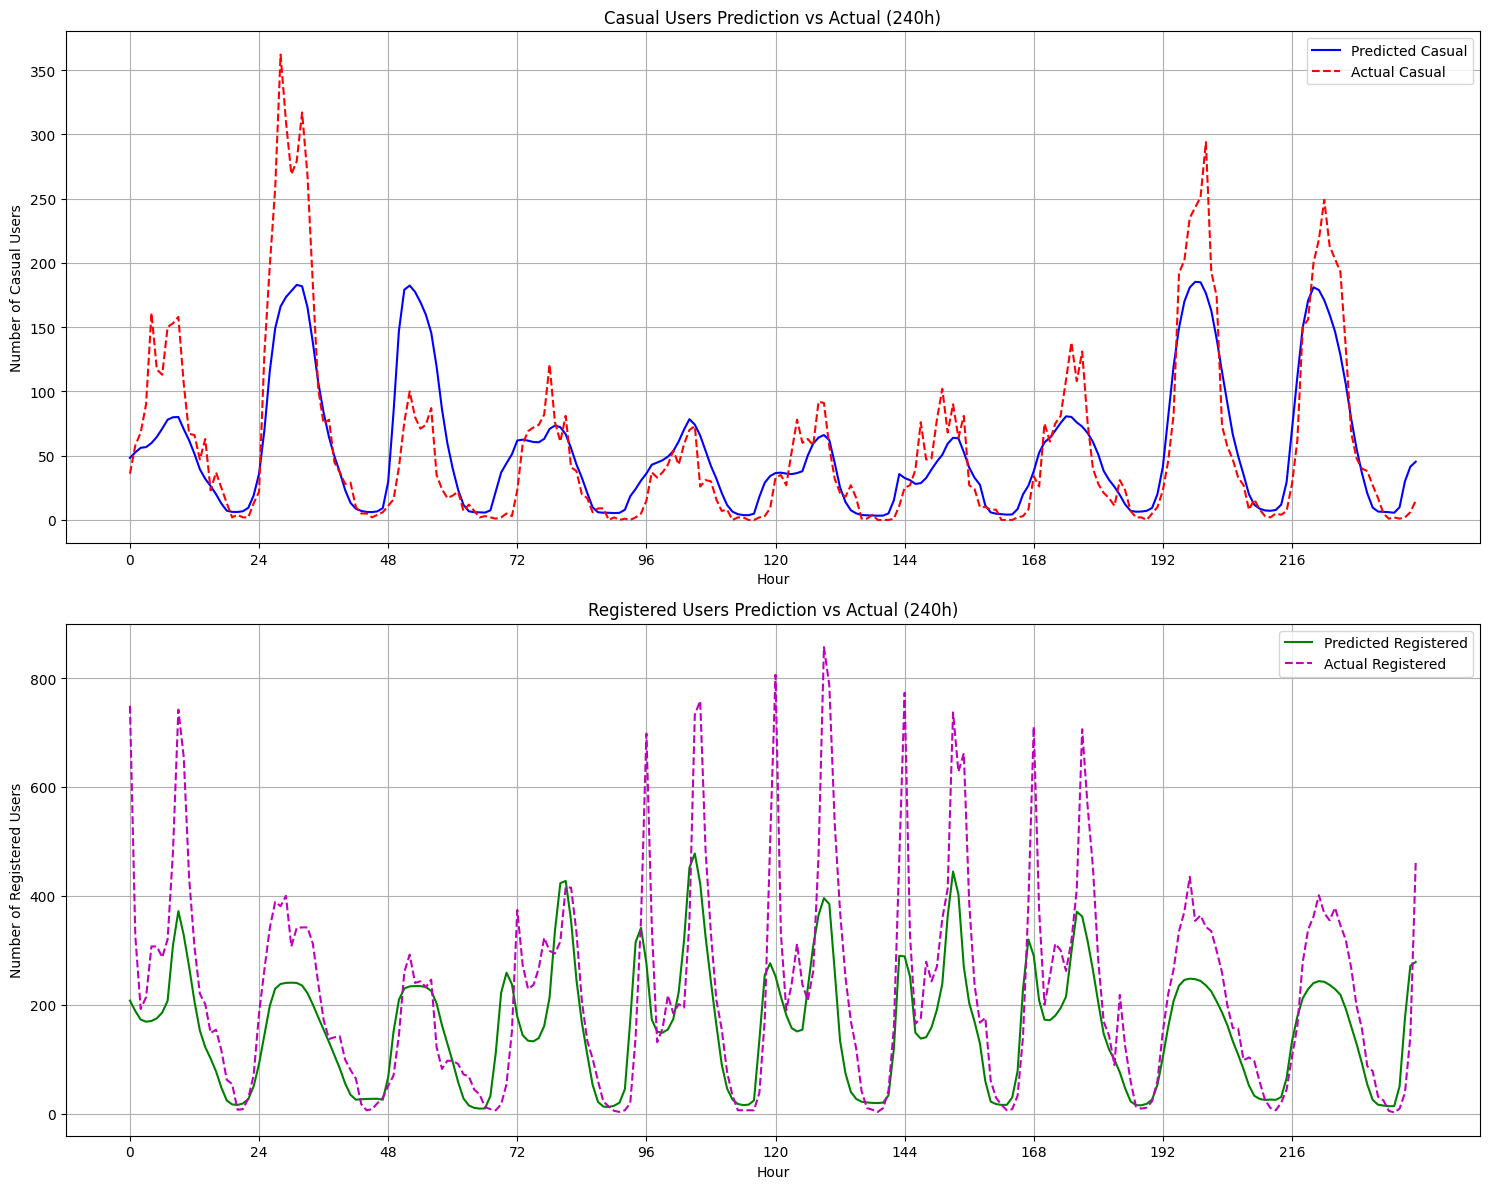


Prediction result of 240 hour (Window #192):
MSE: 32132.7734
RMSE: 179.2562
MAE: 118.6945


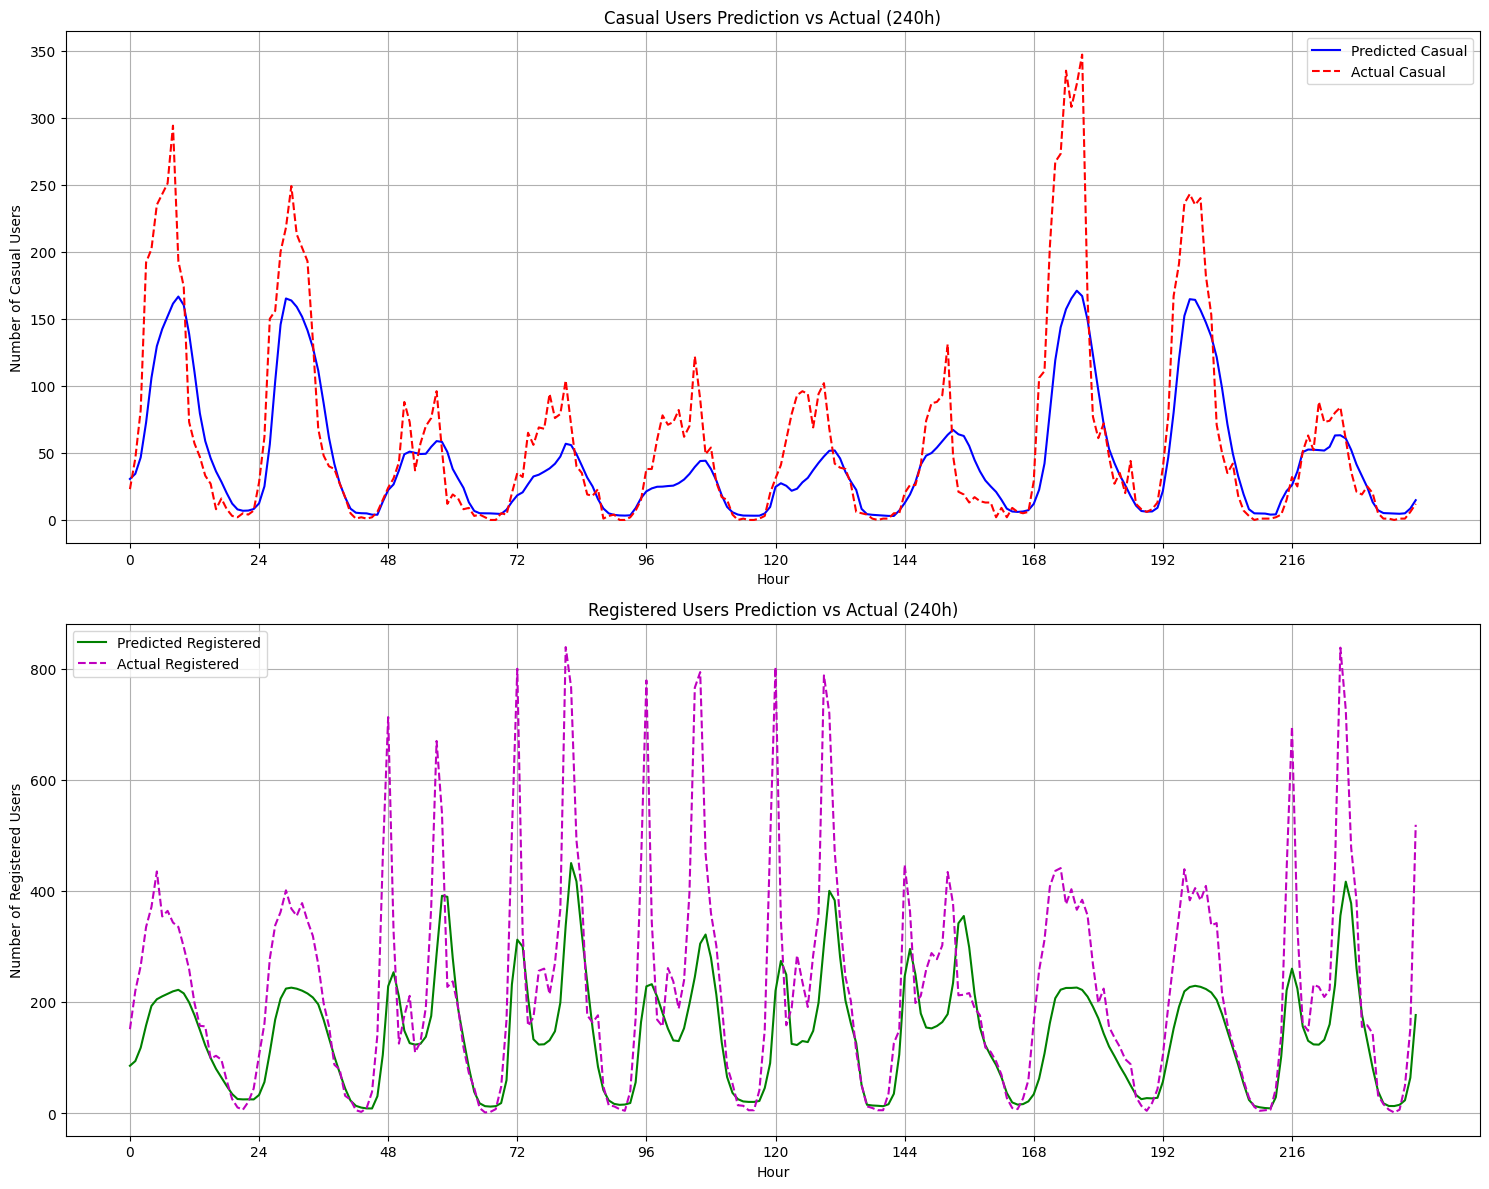


Prediction result of 240 hour (Window #384):
MSE: 44301.0664
RMSE: 210.4782
MAE: 148.3756


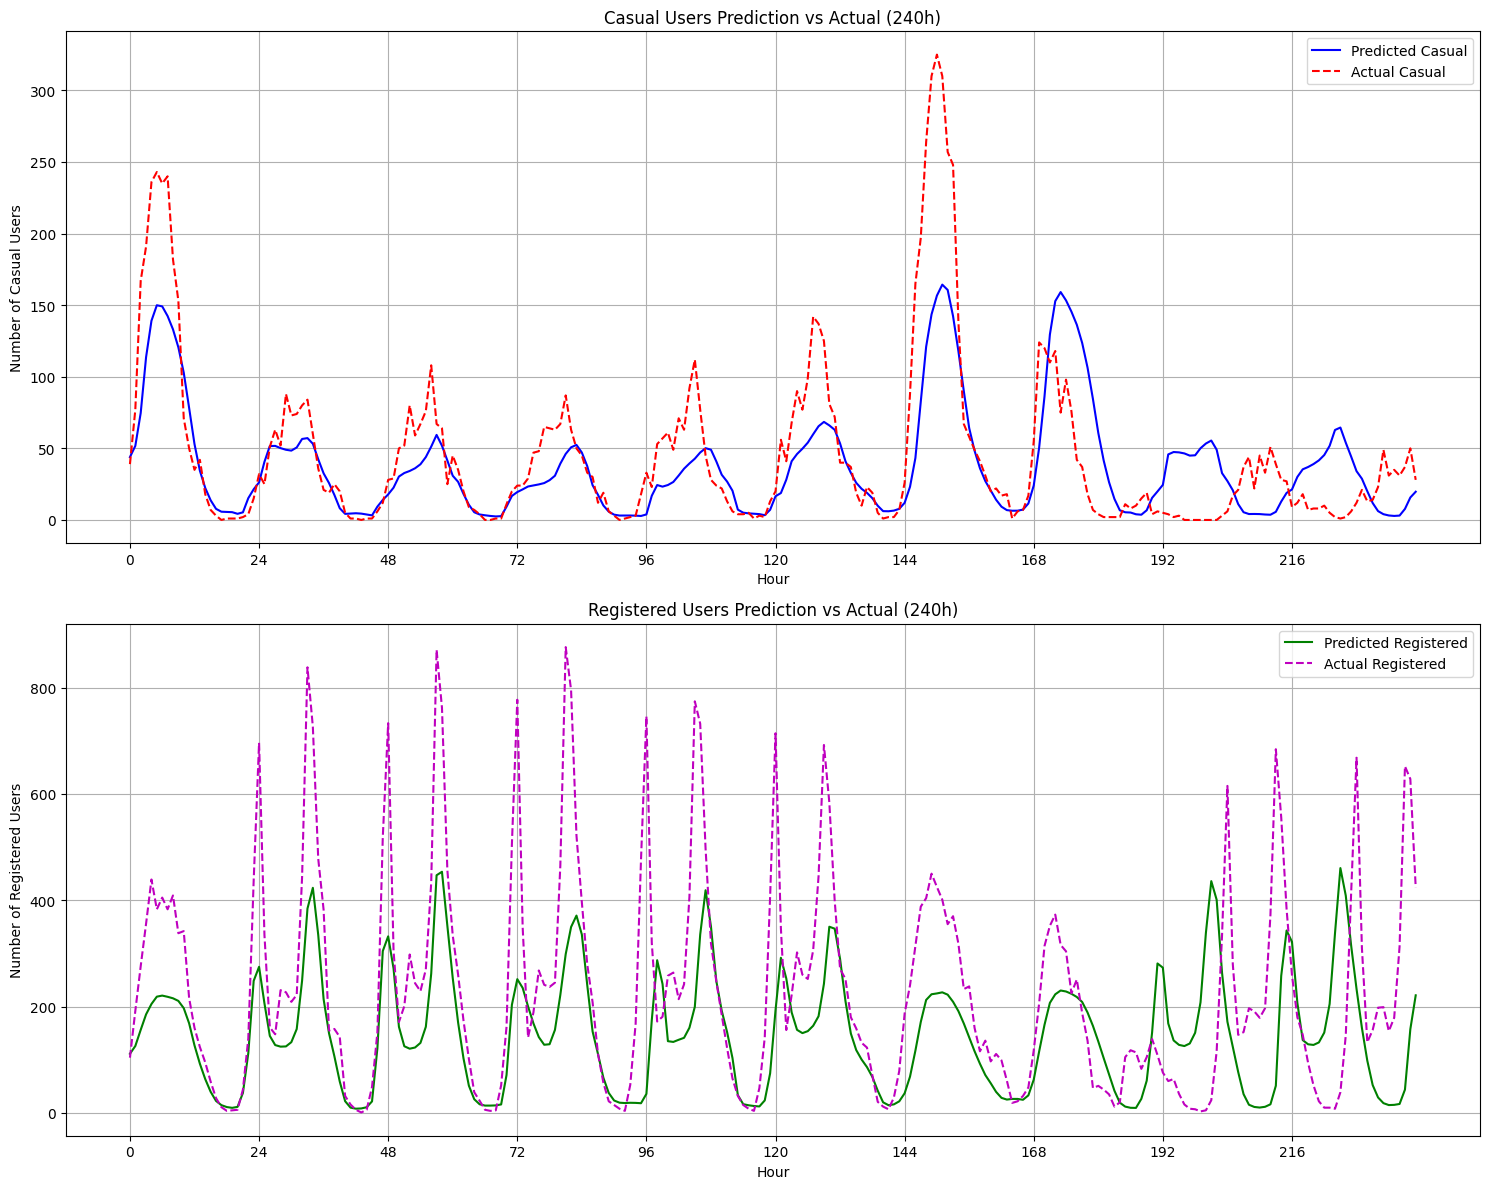

In [10]:
# 测试
def visualize_single_window(predictions, actuals, window_idx=0, window_size=96, plot=False):
    """Visualizes and compares predicted vs. actual bike rental counts for a specific time window
    Args:
        predictions: prediction values
        actuals: actual values
        window_idx: the index of window to show
        window_size: size of window
    """
    pred_window = predictions[window_idx]
    actual_window = actuals[window_idx]

    hours = range(window_size)

    df = pd.DataFrame({
        'Hour': hours,
        'Predicted_Casual': pred_window[:, 0],
        'Actual_Casual': actual_window[:, 0],
        'Predicted_Registered': pred_window[:, 1],
        'Actual_Registered': actual_window[:, 1]
    })
    # Sum along features dimension for each sample
    # Selectable
    actual_window = actual_window.sum(axis=1)
    pred_window = pred_window.sum(axis=1)

    # Calculate metrics
    mse = mean_squared_error(actual_window, pred_window)
    mae = mean_absolute_error(actual_window, pred_window)
    rmse = np.sqrt(mse)

    print(f"\nPrediction result of {window_size} hour (Window #{window_idx}):")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    df.to_csv('single_window_prediction.csv', index=False)
    if plot:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
        xticks = np.arange(0, window_size, 24)
        # 绘制Casual预测
        ax1.plot(df['Hour'], df['Predicted_Casual'],
                 'b-', label='Predicted Casual')
        ax1.plot(df['Hour'], df['Actual_Casual'], 'r--', label='Actual Casual')
        ax1.set_title(f'Casual Users Prediction vs Actual ({window_size}h)')
        ax1.set_xlabel('Hour')
        ax1.set_ylabel('Number of Casual Users')
        ax1.set_xticks(xticks)
        ax1.legend()
        ax1.grid(True)

        # 绘制Registered预测
        ax2.plot(df['Hour'], df['Predicted_Registered'],
                 'g-', label='Predicted Registered')
        ax2.plot(df['Hour'], df['Actual_Registered'],
                 'm--', label='Actual Registered')
        ax2.set_title(
            f'Registered Users Prediction vs Actual ({window_size}h)')
        ax2.set_xlabel('Hour')
        ax2.set_ylabel('Number of Registered Users')
        ax2.set_xticks(xticks)
        ax2.legend()
        ax2.grid(True)

        plt.tight_layout()
        plt.savefig(f'prediction_comparison_{window_size}h.png')
        plt.show()
    return df, mse, rmse, mae


def evaluate_test_set(model, test_loader, device):
    model.eval()
    predictions = []
    actuals = []

    with torch.no_grad():
        for batch in test_loader:
            x_cat = {k: batch['cat_features'][:, :, i].to(device)
                     for i, k in enumerate(model.embeddings.keys())}
            x_cont = batch['cont_features'].to(device)
            y = batch['target'].to(device)

            recon, _, _ = model(x_cat, x_cont, y.size(1))
            predictions.append(recon.cpu().numpy())
            actuals.append(y.cpu().numpy())

    predictions = np.concatenate(predictions, axis=0)
    actuals = np.concatenate(actuals, axis=0)

    # Reshape the arrays to 2D: (samples*sequence_length, features)
    predictions_2d = predictions.reshape(-1, predictions.shape[-1])
    actuals_2d = actuals.reshape(-1, actuals.shape[-1])

    # Sum along features dimension for each sample
    # Selectable
    predictions_2d = predictions_2d.sum(axis=1)
    actuals_2d = actuals_2d.sum(axis=1)

    # Calculate metrics
    mse = mean_squared_error(actuals_2d, predictions_2d)
    mae = mean_absolute_error(actuals_2d, predictions_2d)
    rmse = np.sqrt(mse)

    return {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'predictions': predictions,
        'actuals': actuals
    }


def main():
    processor = BikeDataProcessor(output_window=OUTPUT_WINDOW_SIZE)
    X_cat, X_cont, y = processor.process_data(
        '/kaggle/input/capitalbikeshare/test_data.csv')
    test_dataset = BikeDataset(X_cat, X_cont, y)
    test_loader = DataLoader(test_dataset, batch_size=32)

    categorical_dims = {
        'season': 4,
        'mnth': 12,
        'hr': 24,
        'holiday': 2,
        'weekday': 7,
        'workingday': 2,
        'weathersit': 4
    }
    model = SequenceVAE(
        categorical_dims=categorical_dims,
        continuous_dims=len(processor.continuous_features)
    )
    model.load_state_dict(torch.load('best_model.pt'))
    model.to(DEVICES)

    results = evaluate_test_set(model, test_loader, 'cuda')

    print(f"Metric on test dataset:")
    print(f"MSE: {results['mse']:.4f}")
    print(f"RMSE: {results['rmse']:.4f}")
    print(f"MAE: {results['mae']:.4f}")

    for i in range(0, 480, 192):
        visualize_single_window(
            results['predictions'], results['actuals'], window_idx=i, window_size=OUTPUT_WINDOW_SIZE, plot=True)


if __name__ == "__main__":
    main()